# Logistic Regressions 

In a binary classification setting, we have a "positive" and a "negative" class, and we want to build a classifier that detects positive entries. One way to achieve this is to use numerical values to encode the two categories and fit a linear regression. For instance, we can encode negative entries with a 0 and positive ones with a 1 and then predict the positive class if our linear regression predicts a value above 0.5.

The idea is a bit similar in logistic regressions. Instead of using a threshold, we convert the output of the linear regression model into probabilities using the logistic function, also **called sigmoid function**

$σ(x)=1 / (1+e−x)$

This function associates large negative values 
x
 with probabilities close to zero and large positive ones with probabilities close to one. Here is a plot of the function for 
x
 values between -6 and 6

In [1]:
from IPython.display import Image

In [2]:
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3865/sigmoid.svg')

The idea is to use this sigmoid function to compute the probability of being in the positive class. We can express this using the following formula.

$p(y=1|x) = σ(f(x))$

The probability that the target y is one (positive class) given its input value x is equal to the value of the sigmoid function at f(x) which corresponds to the output of our linear regression model. There are three cases.

* p < 0.5 when the linear regression outputs a negative value.
* p>0.5 when the output is positive.
* p = 0.5 when f(x)=0

In other words, the output of the linear regression $f(x)$ (called the logit) controls the uncertainty of the logistic regression model. Note that the probability of the negative class is simply one minus this probability.



The equation from above is the equation of the logistic regression model - it tells us how to compute predictions for new data points 
x
, but not how to find the model coefficients.

We won't go into the details in this course, but in short, instead of minimizing the least squares, logistic regressions minimize the **cross-entropy (CE)** loss function that we can derive by computing the **maximum likelihood estimation (MLE)**. You can take a look at this video which shows how to apply MLE to derive the loss function. Once we have this loss function, we can optimize it using the usual algorithms ex. gradient descent.

Let's see how to implement logistic regressions using Scikit-learn.

### Iris data set
We will use the iris data set to illustrate logistic regressions. It's a set of 150 petal/sepal width and length measurements from iris flowers of three different types: setosa, versicolor and virginica.

We can load it using the load_iris() function from the Scikit-learn datasets module.

In [1]:
from sklearn import datasets

# Load data set
iris = datasets.load_iris()

print('Type:', type(iris)) 

Type: <class 'sklearn.utils.Bunch'>


The function returns a Bunch object that we can use as a dictionary. Let's take a look at its keys

In [2]:
# Inspect object
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

The dictionary has five entries

* data - the input matrix
* target - the target vector
* target_names - the name of the categories
* DESCR - a description of the data set
* feature_names - the name of the features
Let's take a look at the feature names



In [3]:
# Get feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

There are four features in total. Each one corresponds to a column in the data input matrix. The target values are encoded with numbers between 0 and 2. Let's count the number of values in each category

In [4]:
import pandas as pd

# Category distribution
pd.value_counts(iris['target'])

2    50
1    50
0    50
dtype: int64

There are 50 flowers per type. These numerical labels correspond to the indexes of the target names in the target_names list

In [5]:
# Categories
print('Target names:', iris.target_names)

Target names: ['setosa' 'versicolor' 'virginica']


In this unit, we will create a binary classifier that recognizes setosa flowers. Hence, we need to create a target vector y that encodes positive entries (setosa) with ones and negative entries (versicolor and virginica) with zeros

In [6]:
# Create the binary target vector
y = (iris['target'] == 0).astype(int)

In this code, we create an array of boolean values where True denotes the positive class and False the negative one. We then convert the boolean values into zeros and ones using the astype(int) function.

In this example, we will only work with the petal features, i.e., petal width and petal length. They correspond to the columns with indices 2 and 3 according to the feature_names list from above. Let's create the input matrix

In [7]:
# Create the input matrix
X = iris['data'] # Get matrix with all features
X = X[:, [2, 3]] # Keep only petal features

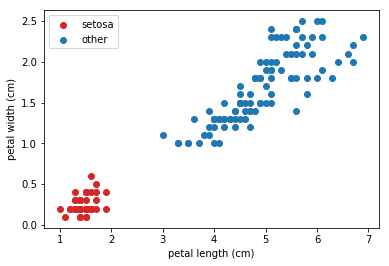

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
setosa_idx = (y == 1) # setosa data points

plt.scatter(X[:, 0][setosa_idx], X[:, 1][setosa_idx],
    color='C3', label='setosa') # Setosa
plt.scatter(X[:, 0][~setosa_idx], X[:, 1][~setosa_idx],
    color='C0', label='other') # Versicolor and virginica

# Set labels
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In this code, we create a setosa_idx list where True entries correspond to setosa flowers. We can then use this list of booleans to separate and plot the two categories with different colors. You should get the following result.

As we can see, there is a clear separation between the two classes. In this case, we say that the data is linearly separable because it's possible to draw a line (or a hyperplane in higher dimensions) that separates the different categories.

Let's see how to separate these two classes using logistic regressions.

### Scikit-learn implementation

In [9]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=0)

Scikit-learn implements a LogisticRegression object which follows the standard estimator API. To avoid any issue with the features scale, let's encapsulate the estimator in a pipeline with a StandardScaler

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create the estimator
logreg = make_pipeline(StandardScaler(), LogisticRegression())

# Fit it to train data
logreg.fit(X_tr, y_tr);

C:\Users\lyeso\anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


cikit-learn returns a FutureWarning to warn us that the default algorithm which finds the coefficients of our logistic regression will be changed in a next version of the library.

Let's fix the warning by specifying the solver. The LogisticRegression documentation recommends using the liblinear one for small data sets.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let's try it 

In [11]:
# Create the estimator
logreg = make_pipeline(
    StandardScaler(), LogisticRegression(solver='liblinear'))

# Fit it to train data
logreg.fit(X_tr, y_tr)

# Accuracy on test set
accuracy = logreg.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 1.000


Our classifier labels the new data point with a one (positive class) which means that it's likely a setosa flower. We can obtain the probabilities from the sigmoid with predict_proba()

In [13]:
# New flower
new_flower = [
    1.5, # petal length (cm)
    0.3, # petal width (cm)
]

# Classify it
logreg.predict([new_flower])


array([1])

Our classifier labels the new data point with a one (positive class) which means that it's likely a setosa flower. We can obtain the probabilities from the sigmoid with predict_proba()

In [14]:
# Get probabilities
logreg.predict_proba([new_flower])

array([[0.05238258, 0.94761742]])

The function returns the probability for each category. In our case, we get two probabilities. The first one corresponds to the negative class and the second one to the positive class. **According to our classifier, the new data point is a setosa flower with probability 0.95.**

Note that we can use this function to **visualize the decision surface of our classifier** and draw the boundary that delimits the two classes by marking points with 
p
=
0.5
. We provide a decision_surface(X, y, logreg) function in the annex. In short, the function creates a grid of data points in the range of our X/y values and evaluates their probability using our logreg estimator.

In [16]:
import numpy as np

# Helper function
def decision_surface(ax, X, y, logreg):
    # Plot data points
    setosa_idx = (y == 1) # Setosa data points

    plt.scatter(X[:, 0][setosa_idx], X[:, 1][setosa_idx],
        color='C3', label='setosa') # Setosa
    plt.scatter(X[:, 0][~setosa_idx], X[:, 1][~setosa_idx],
        color='C0', label='other') # Versicolor and virginica

    # Create a grid of values
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x_values = np.linspace(*xlim, num=40)
    y_values = np.linspace(*ylim, num=40)
    xx, yy = np.meshgrid(x_values, y_values)
    points = np.c_[xx.flatten(), yy.flatten()]

    # Probability for positive class (setosa)
    probs = logreg.predict_proba(points)
    prob_setosa = probs[:, 1]

    # Draw decision boundary (p=0.5)
    zz = prob_setosa.reshape(xx.shape)
    plt.contour(xx, yy, zz, levels=[0.5], colors='gray')

    # Plot decision surface with level curves
    plt.contourf(xx, yy, zz, 10, alpha=0.3, cmap=plt.cm.coolwarm)

    # Add labels
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.legend()
    plt.colorbar(label='probability')
    plt.show()

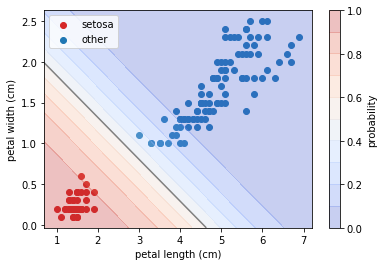

In [17]:
# Plot decision surface
fig = plt.figure()
decision_surface(fig.gca(), X, y, logreg)

We use a red/blue scale to plot the decision surface. Regions in red are associated with probabilities close to one and regions in blue with probabilities close to zero. The gray line delimits points with 
p<0.5
 from points with 
p>0.5
.

### Summary
In this unit, we learned about the logistic regression model in the binary classification case and saw how to implement it using Scikit-learn. In the next unit, we will see how to generalize to multiple categories.

# Multiclass classification

In the last unit, we learned about logistic regression and saw how to use it to build a binary classifier that distinguishes between two classes. We will now generalize this concept to the case where there are more than two possible classes. Such case is called a multiclass classification problem. In this unit, we will discuss two different ways to apply logistic regressions to the multiclass case.

* Using softmax regression which directly generalizes logistic regressions to multiple classes.
* Using the one-vs.-one (OvO) and the one-vs.-rest (OvR) strategies that convert the multiclass classification problem into several binary classifications.

Note that the second option is not specific to logistic regressions and can use any set of binary classifiers to solve a multiclass classification problem.

### Softmax regression

Softmax regression, also known as multinomial logistic regression, is simply the generalization of the logistic regression model to multiple classes. In the binary case, we compute the probability that a point 
x
 is in the "positive" class 
y
=
1
 by transforming the output of a linear regression model 
f
(
x
)
 into a probability using the logistic function. In the multiclass case, we have one linear regression for each class, and we transform their output into probabilities using the softmax function.
 
 p
(
y
=
i
|
x
)
=
e
f
i
(
x
)
∑
k
j
=
1
e
f
j
(
x
)

n this equation, we denote the output of the linear regression for the i-th class with 
f
i
(
x
)
 and we compute the probability of being in this class by taking the exponential of this value 
e
f
i
(
x
)
 normalized by the sum of the exponential values of all the classes 
∑
k
j
=
1
e
f
j
(
x
)
 to make the probabilities sum to one.
 
 
### One-vs.-one (OvO) strategy

It's also possible to solve multiclass classification tasks by combining several binary classifiers. For instance, **the one-vs.-one (OvO) strategy** fits one binary classifier for each pair of classes and makes these classifiers vote. Let's take an example, say that we want to use logistic regressions to solve a classification task with four categories. In this case, we will need to fit 6 logistic regressions.

* Classifier 1 - class 1 vs. class 2
* Classifier 2 - class 1 vs. class 3
* Classifier 3 - class 1 vs. class 4
* Classifier 4 - class 2 vs. class 3
* Classifier 5 - class 2 vs. class 4
* Classifier 6 - class 3 vs. class 4

We can then evaluate each classifier and predict the class with the maximum number of votes. For instance, say that we run each classifier from above on a new data point and get the following results.

* Classifier 1 - class 2 wins
* Classifier 2 - class 1 wins
* Classifier 3 - class 4 wins
* Classifier 4 - class 2 wins
* Classifier 5 - class 2 wins
* Classifier 6 - class 3 wins

In this case, we will predict class 2 because it has the most number of votes (in the case of a tie the confidence levels of the classifiers would also be used for the decision). One of the advantages of this strategy is that each classifier only involves two classes. Hence, we only need a subset of the data to fit each classifier. This might be helpful if our classifiers don't scale well to a large number of data points.

**However, the OvO strategy requires one classifier for each pair of classes**. If we count the number of possible combinations, we can show that it's equal to 
k
(
k
−
1
)
/
2
 where 
k
 is the number of classes. This number increases quadratically with 
k
 and hence doesn't scale well to many classes. This plot shows the number of binary classifiers needed by the OvO strategy as a function of the number of classes.
 
### One-vs.-rest (OvR) strategy

One solution is to use the one-vs.-rest (OvR) strategy. The idea is to fit a binary classifier that separates each class from the other ones and trust the most confident classifier. For instance, in the example from above, there are four classes, and we need to fit four binary classifiers.

* Classifier 1 - class 1 vs. other classes
* Classifier 2 - class 2 vs. other classes
* Classifier 3 - class 3 vs. other classes
* Classifier 4 - class 4 vs. other classes

Given a new data point 
x
, each classifier estimates the probability that the point belongs to its "positive" class 
p
(
y
i
=
1
|
x
)
. For instance, say that we run each classifier from above on a new data point and get the following results.

* Classifier 1 - p(y1=1|x)=0.12
* Classifier 2 - p(y2=1|x)=0.84
* Classifier 3 - p(y3=1|x)=0.16
* Classifier 4 - p(y4=1|x)=0.32

In this case, we will predict class 2 since it has the highest probability. Note that, unlike the softmax regression, the probabilities here do not necessarily sum up to one.

This strategy **has many advantages compared to the OvO strategy. First, it's computationally efficient since the number of classifiers is equal to the number of classes. The results are also easier to interpret since each category corresponds to a classifier.**

### Summary

In this unit, we saw different ways to perform multiclass classification using logistic regressions. In practice, it's common to try both the one-vs.-rest (OvR) strategy and softmax regression, and see which one gives the best results. In the next unit, we will see how to implement both options with the LogisticRegression estimator from Scikit-learn.